In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models
import datetime
import time
from matplotlib import pyplot as plt

# 图片卷积处理
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [2]:
data_path = '../data-unversioned/p1ch7/'
# 标准集
cifar10_standard = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor()) # <1>
# 验证集合
cifar10_val_standard = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# 图片归一化
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
]))

# def get_image(,):
    # 根据当前数据集进行遍历相应数据，获取相应图片


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])


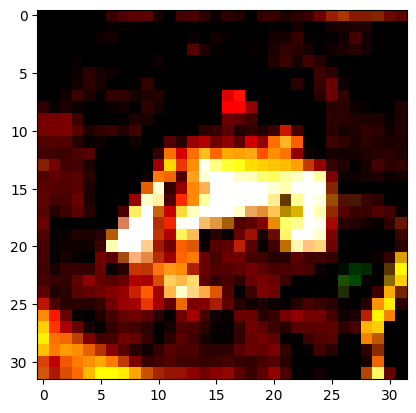

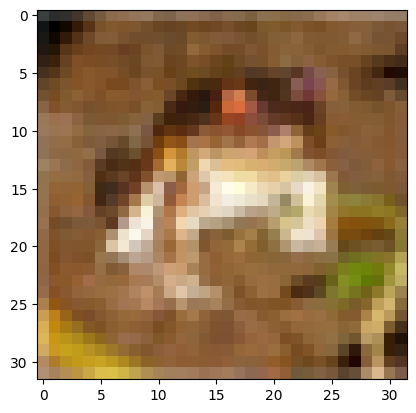

torch.Size([32, 32, 3])


In [4]:

img, _ = cifar10[0]
img_s, _ =cifar10_standard[0]

print(img.shape)
plt.imshow(img.permute(1, 2, 0))
plt.show()

plt.imshow(img_s.permute(1, 2, 0))
plt.show()
print(img.permute(1, 2, 0).shape)

In [5]:
"""
综合起来，这一行代码定义了一个输入通道数为3，输出通道数为16，卷积核大小为3x3的二维卷积层。当输入图像被传递给这个卷积层时，它将使用16个3x3的滤波器对图像进行卷积操作，并输出16个特征图

output3 = F.conv2d(input, kernal, stride=(1, 2))    移动的步横向为1，纵向为2
"""
conv = nn.Conv2d(3, 16, kernel_size=3) # <1>默认横向为1，纵向为1
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

torch.Size([16, 30, 30]) torch.Size([30, 30, 16])
torch.Size([30, 30])


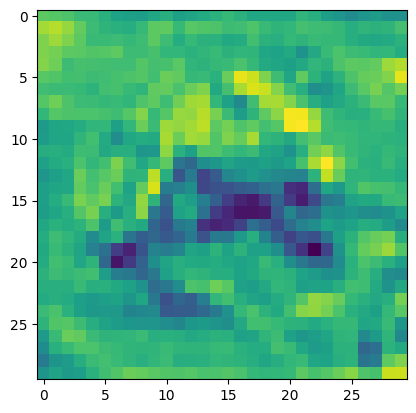

In [6]:
# 输出相应图片处理
output = conv(img)
# print(output.shape, output)
print(output.detach().shape, output.permute(1,2,0).shape)
print(output.unsqueeze(0)[0, 1].detach().shape)
plt.imshow(output.unsqueeze(0)[0, 1].detach())
plt.show()


torch.Size([1, 3, 32, 32]) torch.Size([1, 16, 30, 30])
torch.Size([30, 30])


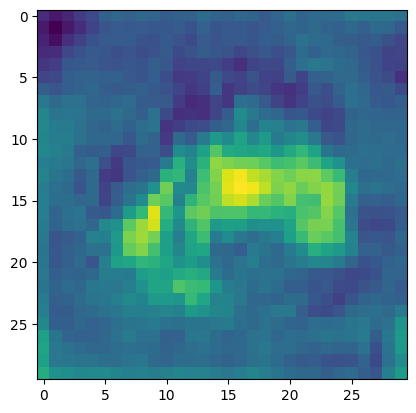

In [7]:
# 通过新增张量的纬度来看数据
output = conv(img.unsqueeze(0))
print(img.unsqueeze(0).shape, output.shape)
print(output[0, 0].detach().shape)
plt.imshow(output[0, 0].detach())
plt.show()

```
output = conv(img)
output.unsqueeze(0)[0, 1].detach()
和下面这段代码有什么区别？
output = conv(img.unsqueeze(0))
output[0, 0].detach()
```
这两段代码的主要区别在于输入张量的形状不同，导致输出张量的形状也不同。

第一段代码中，`output = conv(img)`表示对图像`img`进行卷积操作，并将卷积结果存储在`output`张量中。由于`img`是一个三维张量，而卷积层的输入通常是四维张量（包括批次维度），因此在进行卷积操作前，需要使用`unsqueeze()`方法将`img`的形状从`(H, W, C)`变为`(1, H, W, C)`，以添加一个批次维度。然后，我们可以对其进行卷积操作，并得到一个形状为`(1, H', W', C')`的输出张量。接着，`output.unsqueeze(0)`将输出张量的形状从`(1, H', W', C')`变为`(1, 1, H', W', C')`，即在输出张量的前面再添加一个批次维度。最后，`output.unsqueeze(0)[0, 1].detach()`表示从输出张量中取出第一个批次和第二个通道的特征图，并使用`detach()`方法将其从计算图中分离出来，得到一个新的张量。

第二段代码中，`output = conv(img.unsqueeze(0))`表示将图像`img`添加一个批次维度，并将其作为一个批次输入传递给卷积层进行卷积操作。这样，我们可以直接得到一个形状为`(1, H', W', C')`的输出张量。然后，`output[0, 0].detach()`表示从输出张量中取出第一个批次和第一个通道的特征图，并使用`detach()`方法将其从计算图中分离出来，得到一个新的张量。
因此，这两段代码的主要区别在于输入张量的形状不同，第一段代码需要使用`unsqueeze()`方法手动添加批次维度，而第二段代码则是在输入时就将图像添加了批次维度。


torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32]) torch.Size([1, 6, 28, 28])
torch.Size([28, 28])


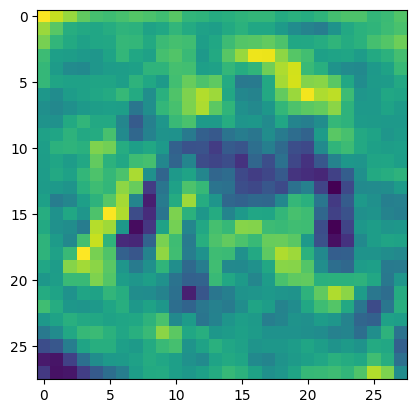

In [8]:
print(img.shape)
# 32-5+1 = 28
conv1 = nn.Conv2d(3, 6, 5)
# 可得输出6*28*28
output = conv1(img.unsqueeze(0))
print(img.unsqueeze(0).shape, output.shape)
print(output[0, 0].detach().shape)
plt.imshow(output[0, 0].detach())
# plt.imshow(output[0, 4].detach())
plt.show()

torch.Size([1, 6, 14, 14])


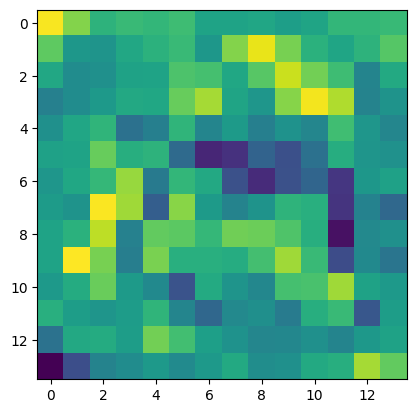

In [9]:
pool1 = nn.MaxPool2d(2, 2)
# 14*14（28/2）
output1 = pool1(output)
print(output1.shape)
plt.imshow(output1[0, 0].detach())
plt.show()

torch.Size([1, 16, 10, 10])


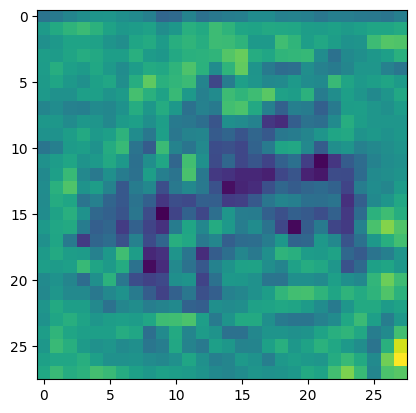

In [10]:
# 通过两个方法进行测试和回归
conv2 = nn.Conv2d(6, 16, 5)
output3 = conv2(output1)
print(output3.shape)
plt.imshow(output[0, 2].detach())
plt.show()

In [11]:
arr = []
i = 0
for item  in cifar10:
    print(item)
    is_add = True
    for a_item in arr:
        if item[1] == a_item[1]:
            is_add = False
    if is_add:
        arr.append(item)
    if len(arr) == 10:
        break
    i += 1
print(arr)

(tensor([[[-1.0531e+00, -1.3072e+00, -1.1960e+00,  ...,  5.1866e-01,
           4.2339e-01,  3.5989e-01],
         [-1.7358e+00, -1.9899e+00, -1.7041e+00,  ..., -3.7033e-02,
          -1.0054e-01, -5.2909e-02],
         [-1.5930e+00, -1.7358e+00, -1.2119e+00,  ..., -1.1642e-01,
          -8.4663e-02, -2.5931e-01],
         ...,
         [ 1.3125e+00,  1.2014e+00,  1.1537e+00,  ...,  5.5041e-01,
          -1.1008e+00, -1.1484e+00],
         [ 8.6794e-01,  7.5681e-01,  9.6321e-01,  ...,  9.3145e-01,
          -4.4983e-01, -6.7210e-01],
         [ 8.2031e-01,  6.7742e-01,  8.5207e-01,  ...,  1.4395e+00,
           4.0752e-01, -3.7033e-02]],

        [[-9.8219e-01, -1.2399e+00, -1.2077e+00,  ...,  1.4516e-01,
           3.2427e-02,  1.6322e-02],
         [-1.6586e+00, -1.9807e+00, -1.8519e+00,  ..., -5.6346e-01,
          -6.4398e-01, -5.7956e-01],
         [-1.5942e+00, -1.8680e+00, -1.5459e+00,  ..., -6.2788e-01,
          -6.2788e-01, -8.0503e-01],
         ...,
         [ 7.5715e-01,  

torch.Size([1, 3, 32, 32]) torch.Size([1, 6, 28, 28])
torch.Size([28, 28])


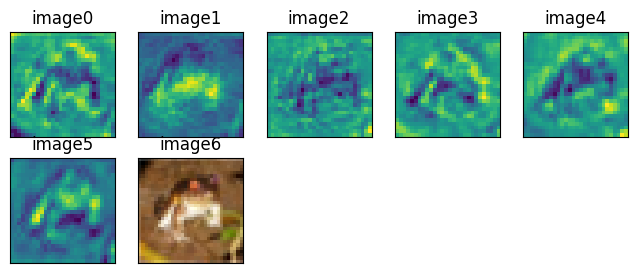

In [16]:
# torch.relu(self.conv1(x))
# 处理相应数据

output_s = conv1(img_s.unsqueeze(0))
print(img_s.unsqueeze(0).shape, output_s.shape)
num = output_s.shape[1]
print(output_s[0, 0].detach().shape)
# plt.imshow(output_s[0, 1].detach())
# plt.show()
# 处理相关
fig = plt.figure(figsize=(8,3))

for i in range(num):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title('image{}'.format(i))
    # img = next(img for img, label in cifar10 if label == i)
    plt.imshow(output_s[0, i].detach())

ax = fig.add_subplot(2, 5, 1 + num, xticks=[], yticks=[])
ax.set_title('image{}'.format(6))
plt.imshow(img_s.permute(1, 2, 0))

plt.show()

torch.Size([1, 3, 32, 32]) torch.Size([1, 6, 28, 28])
torch.Size([28, 28])


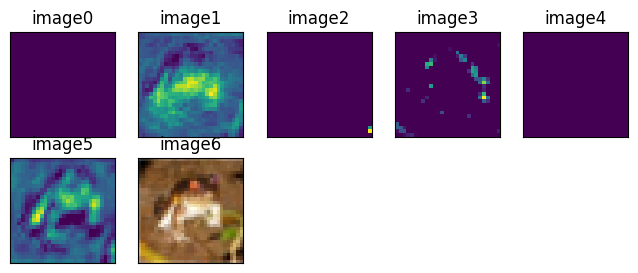

In [18]:

output_s = torch.relu(conv1(img_s.unsqueeze(0)))
print(img_s.unsqueeze(0).shape, output_s.shape)
num = output_s.shape[1]
print(output_s[0, 0].detach().shape)
# plt.imshow(output_s[0, 1].detach())
# plt.show()
# 处理相关
fig = plt.figure(figsize=(8,3))

for i in range(num):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title('image{}'.format(i))
    # img = next(img for img, label in cifar10 if label == i)
    plt.imshow(output_s[0, i].detach())
ax = fig.add_subplot(2, 5, 1 + num, xticks=[], yticks=[])
ax.set_title('image{}'.format(6))
plt.imshow(img_s.permute(1, 2, 0))

plt.show()

torch.Size([1, 3, 32, 32]) torch.Size([1, 16, 5, 5])
torch.Size([5, 5])


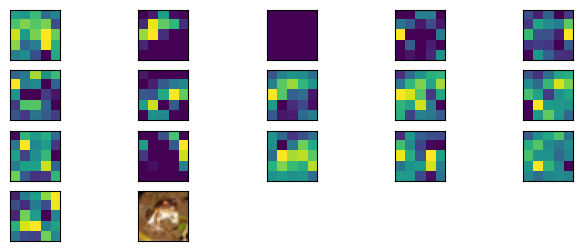

In [30]:
pool1 = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
pool2 = nn.MaxPool2d(2, 2)

outputs1 = pool1(torch.relu(conv1(img_s.unsqueeze(0))))
outputs1 = pool2(torch.relu(conv2(outputs1)))

print(img_s.unsqueeze(0).shape, outputs1.shape)
num = outputs1.shape[1]
heights = int(num / 5) + 1

print(outputs1[0, 0].detach().shape)
# plt.imshow(output_s[0, 1].detach())
# plt.show()
# 处理相关
fig = plt.figure(figsize=(8,3))

for i in range(num):
    ax = fig.add_subplot(heights, 5, 1 + i, xticks=[], yticks=[])
    # ax.set_title('image{}'.format(i))
    # img = next(img for img, label in cifar10 if label == i)
    plt.imshow(outputs1[0, i].detach())

ax = fig.add_subplot(heights, 5, 1 + num, xticks=[], yticks=[])
# ax.set_title('image{}'.format(6))
plt.imshow(img_s.permute(1, 2, 0))

plt.show()

In [32]:
conv2.weight.shape

torch.Size([16, 6, 5, 5])